# Machine Learning Data Preprocessing Template

Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Importing the Dataset

In [ ]:
df = pd.read_csv(r'TMDB_movie_dataset_v11.csv')

Exploratory Data Analysis (Getting ready to be shocked😮)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084383 entries, 0 to 1084382
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1084383 non-null  int64  
 1   title                 1084370 non-null  object 
 2   vote_average          1084383 non-null  float64
 3   vote_count            1084383 non-null  int64  
 4   status                1084383 non-null  object 
 5   release_date          925357 non-null   object 
 6   revenue               1084383 non-null  int64  
 7   runtime               1084383 non-null  int64  
 8   adult                 1084383 non-null  bool   
 9   backdrop_path         293910 non-null   object 
 10  budget                1084383 non-null  int64  
 11  homepage              116376 non-null   object 
 12  imdb_id               591348 non-null   object 
 13  original_language     1084383 non-null  object 
 14  original_title        1084370 non-

Looking for duplicates

In [ ]:
duplicate_count = df['id'].duplicated().sum()
print("Total number of movies in the dataset:", duplicate_count)

Total number of movies in the dataset: 666


Removing Duplicates

In [ ]:
df = df.drop_duplicates(subset=['id'])
print('duplicates removed')

duplicates removed


Finding the number of null values

In [ ]:
df.isnull().sum()

,0
id,0
title,13
vote_average,0
vote_count,0
status,0
release_date,158610
revenue,0
runtime,0
adult,0
backdrop_path,789859


Removing Null Values from the Tittle Column

In [ ]:
df = df.dropna(subset=['title'])
print('null values removed')

null values removed


Selecting the dataset to use

In [ ]:
dataset = df.head(10000)

In [ ]:
dataset.isnull().sum()

,0
id,0
title,0
vote_average,0
vote_count,0
status,0
release_date,0
revenue,0
runtime,0
adult,0
backdrop_path,12


Dropping Unneccesary Columns

In [ ]:
dataset = dataset.drop(['backdrop_path','homepage','imdb_id','overview','popularity','poster_path','tagline','spoken_languages','keywords'], axis=1)
print(dataset.columns)

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'budget', 'original_language',
       'original_title', 'genres', 'production_companies',
       'production_countries'],
      dtype='object')


**Feature Selection and/or Elimination**

STEPS:
1.   Seting the Significance level at **0.05 (5%)**
2.   Calculate the P-Value for each Feature with **Revenue**
2.   Remove any feature that has a P-Value > 0.05

In [ ]:
from scipy.stats import ttest_ind

def calculate_p_values_with_revenue(dataset, revenue):

    p_values = {}
    for col in dataset.columns:
        if col != revenue:
            try:
                p_value = ttest_ind(dataset[col], dataset[revenue])[1]  # Extract p-value from ttest_ind result
                p_values[col] = p_value
            except Exception as e:
                print(f"Error calculating p-value for {col}: {e}")
                p_values[col] = None  # Handle potential errors (e.g., non-numeric columns)

    return p_values

p_value_results = calculate_p_values_with_revenue(dataset, 'revenue')

# Print results with column names
for col, p_value in p_value_results.items():
    print(f"Column: {col}, P-value: {p_value}")


Error calculating p-value for title: unsupported operand type(s) for /: 'str' and 'int'
Error calculating p-value for status: unsupported operand type(s) for /: 'str' and 'int'
Error calculating p-value for release_date: unsupported operand type(s) for /: 'str' and 'int'
Error calculating p-value for original_language: unsupported operand type(s) for /: 'str' and 'int'
Error calculating p-value for original_title: unsupported operand type(s) for /: 'str' and 'int'
Column: id, P-value: 0.0
Column: title, P-value: None
Column: vote_average, P-value: 0.0
Column: vote_count, P-value: 0.0
Column: status, P-value: None
Column: release_date, P-value: None
Column: runtime, P-value: 0.0
Column: adult, P-value: 0.0
Column: budget, P-value: 1.6247597627199332e-151
Column: original_language, P-value: None
Column: original_title, P-value: None
Column: genres, P-value: nan
Column: production_companies, P-value: nan
Column: production_countries, P-value: nan


Eliminating Features

In [ ]:
dataset = dataset.drop(['id','title','status','original_language','original_title','production_companies','production_countries','release_date'], axis=1)
print(dataset.columns)

Index(['vote_average', 'vote_count', 'revenue', 'runtime', 'adult', 'budget',
       'genres'],
      dtype='object')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vote_average  10000 non-null  float64
 1   vote_count    10000 non-null  int64  
 2   revenue       10000 non-null  int64  
 3   runtime       10000 non-null  int64  
 4   adult         10000 non-null  bool   
 5   budget        10000 non-null  int64  
 6   genres        9996 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(1)
memory usage: 556.6+ KB


In [ ]:
dataset.isnull().sum()

,0
vote_average,0
vote_count,0
revenue,0
runtime,0
adult,0
budget,0
genres,4


Filling in Null values

In [ ]:
dataset['genres'] = dataset['genres'].fillna('unknown')
dataset.isnull().sum()

,0
vote_average,0
vote_count,0
revenue,0
runtime,0
adult,0
budget,0
genres,0


Label Encoding Categorical Data

In [ ]:
print(dataset)

      vote_average  vote_count     revenue  runtime  adult     budget  \
0            8.364       34495   825532764      148  False  160000000   
1            8.417       32571   701729206      169  False  165000000   
2            8.512       30619  1004558444      152  False  185000000   
3            7.573       29815  2923706026      162  False  237000000   
4            7.710       29166  1518815515      143  False  220000000   
...            ...         ...         ...      ...    ...        ...   
9995         7.102         256           0       89  False          0   
9996         7.000         256           0       95  False          0   
9997         6.715         256           0       88  False          0   
9998         5.117         256           0       92  False          0   
9999         7.667         256           0      107  False          0   

                                           genres  
0              Action, Science Fiction, Adventure  
1               Adv

Encoding the Adult Column and Genres Column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['adult'] = le.fit_transform(dataset['adult'])
print(dataset)

      vote_average  vote_count     revenue  runtime  adult     budget  \
0            8.364       34495   825532764      148      0  160000000   
1            8.417       32571   701729206      169      0  165000000   
2            8.512       30619  1004558444      152      0  185000000   
3            7.573       29815  2923706026      162      0  237000000   
4            7.710       29166  1518815515      143      0  220000000   
...            ...         ...         ...      ...    ...        ...   
9995         7.102         256           0       89      0          0   
9996         7.000         256           0       95      0          0   
9997         6.715         256           0       88      0          0   
9998         5.117         256           0       92      0          0   
9999         7.667         256           0      107      0          0   

                                           genres  
0              Action, Science Fiction, Adventure  
1               Adv

##Insertng a Multi Label Binarizer(MLB) on genre
A MultiLabelBinarizer is a preprocessing tool in Python's scikit-learn library used for encoding labels for multi-label classification problems. In a multi-label setting, each instance (or sample) can belong to multiple classes simultaneously. The MultiLabelBinarizer transforms these multi-label data into a binary format suitable for machine learning models.

In [ ]:
genre_l = dataset['genres'].apply(lambda x: x.split(','))
genre_l = pd.DataFrame(genre_l)
print(genre_l)

                                                genres
0               [Action,  Science Fiction,  Adventure]
1                [Adventure,  Drama,  Science Fiction]
2                  [Drama,  Action,  Crime,  Thriller]
3     [Action,  Adventure,  Fantasy,  Science Fiction]
4               [Science Fiction,  Action,  Adventure]
...                                                ...
9995                                  [Comedy,  Crime]
9996                                           [Drama]
9997                                          [Comedy]
9998                                [Comedy,  Romance]
9999                                          [Comedy]

[10000 rows x 1 columns]


In [ ]:
genre_l['genres'] = genre_l['genres'].apply(lambda x :[ y.strip().lower().replace(' ','') for y in x] )

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
MLB = MultiLabelBinarizer()
genre_encoded = MLB.fit_transform(genre_l['genres'])
print(genre_encoded)

[[1 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Changing the encoded genre into a Dataframe


In [ ]:
genre_encoded_df = pd.DataFrame(genre_encoded, columns=MLB.classes_)
genre_encoded_df = genre_encoded_df.reset_index()
print(genre_encoded_df)

      index  action  adventure  animation  comedy  crime  documentary  drama  \
0         0       1          1          0       0      0            0      0   
1         1       0          1          0       0      0            0      1   
2         2       1          0          0       0      1            0      1   
3         3       1          1          0       0      0            0      0   
4         4       1          1          0       0      0            0      0   
...     ...     ...        ...        ...     ...    ...          ...    ...   
9995   9995       0          0          0       1      1            0      0   
9996   9996       0          0          0       0      0            0      1   
9997   9997       0          0          0       1      0            0      0   
9998   9998       0          0          0       1      0            0      0   
9999   9999       0          0          0       1      0            0      0   

      family  fantasy  ...  horror  mus

Calculating the P-Value of every Genre with Revenue

In [ ]:
df2 = dataset.reset_index(drop = True)
df3 = pd.concat([dataset['revenue'],genre_encoded_df],axis=1).drop('index',axis=1)
print(df3)

         revenue  action  adventure  animation  comedy  crime  documentary  \
0      825532764       1          1          0       0      0            0   
1      701729206       0          1          0       0      0            0   
2     1004558444       1          0          0       0      1            0   
3     2923706026       1          1          0       0      0            0   
4     1518815515       1          1          0       0      0            0   
...          ...     ...        ...        ...     ...    ...          ...   
9995           0       0          0          0       1      1            0   
9996           0       0          0          0       0      0            0   
9997           0       0          0          0       1      0            0   
9998           0       0          0          0       1      0            0   
9999           0       0          0          0       1      0            0   

      drama  family  fantasy  ...  horror  music  mystery  roma

Calculating the P value

In [ ]:
from scipy.stats import ttest_ind

def calculate_p_values_with_revenue(df3, revenue):

    p_values = {}
    for col in df3.columns:
        if col != revenue:
            try:
                p_value = ttest_ind(df3[col], df3[revenue])[1]  # Extract p-value from ttest_ind result
                p_values[col] = p_value
            except Exception as e:
                print(f"Error calculating p-value for {col}: {e}")
                p_values[col] = None  # Handle potential errors (e.g., non-numeric columns)

    return p_values

p_value_results = calculate_p_values_with_revenue(df3, 'revenue')

# Print results with column names
for col, p_value in p_value_results.items():
    print(f"Column: {col}, P-value: {p_value}")

Column: action, P-value: 0.0
Column: adventure, P-value: 0.0
Column: animation, P-value: 0.0
Column: comedy, P-value: 0.0
Column: crime, P-value: 0.0
Column: documentary, P-value: 0.0
Column: drama, P-value: 0.0
Column: family, P-value: 0.0
Column: fantasy, P-value: 0.0
Column: history, P-value: 0.0
Column: horror, P-value: 0.0
Column: music, P-value: 0.0
Column: mystery, P-value: 0.0
Column: romance, P-value: 0.0
Column: sciencefiction, P-value: 0.0
Column: thriller, P-value: 0.0
Column: tvmovie, P-value: 0.0
Column: unknown, P-value: 0.0
Column: war, P-value: 0.0
Column: western, P-value: 0.0


Joining the Dataset and the Encoded Genres

In [ ]:
dataset_final = pd.concat([df2,genre_encoded_df],axis=1).drop('index',axis=1)
dataset_final = dataset_final.drop(['genres'], axis = 1)
print(dataset_final)

      vote_average  vote_count     revenue  runtime  adult     budget  action  \
0            8.364       34495   825532764      148      0  160000000       1   
1            8.417       32571   701729206      169      0  165000000       0   
2            8.512       30619  1004558444      152      0  185000000       1   
3            7.573       29815  2923706026      162      0  237000000       1   
4            7.710       29166  1518815515      143      0  220000000       1   
...            ...         ...         ...      ...    ...        ...     ...   
9995         7.102         256           0       89      0          0       0   
9996         7.000         256           0       95      0          0       0   
9997         6.715         256           0       88      0          0       0   
9998         5.117         256           0       92      0          0       0   
9999         7.667         256           0      107      0          0       0   

      adventure  animation 

Identifying Outliers

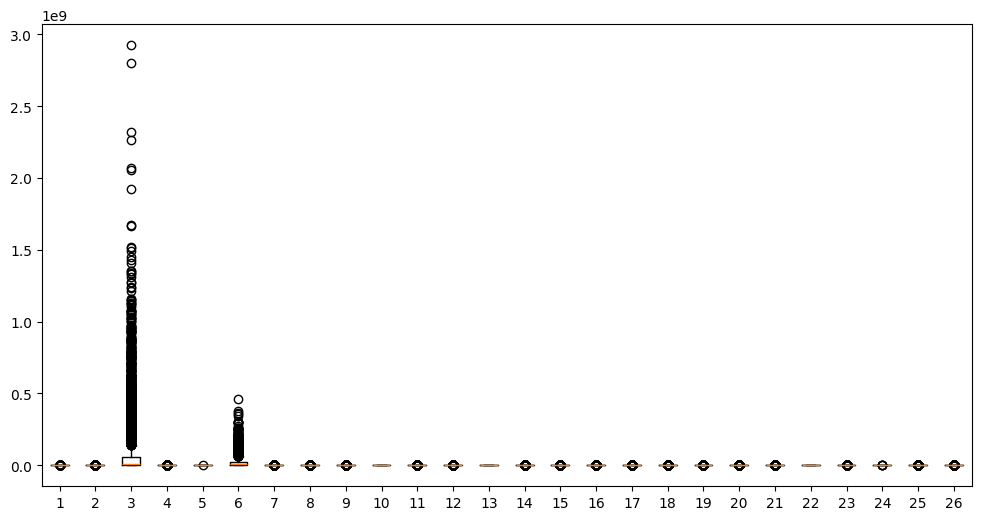

In [ ]:
plt.figure(figsize=(12, 6))  # Width=10, Height=6
plt.boxplot(dataset_final)
plt.show()

Removing Outliers from the revenue Column and Budget Column

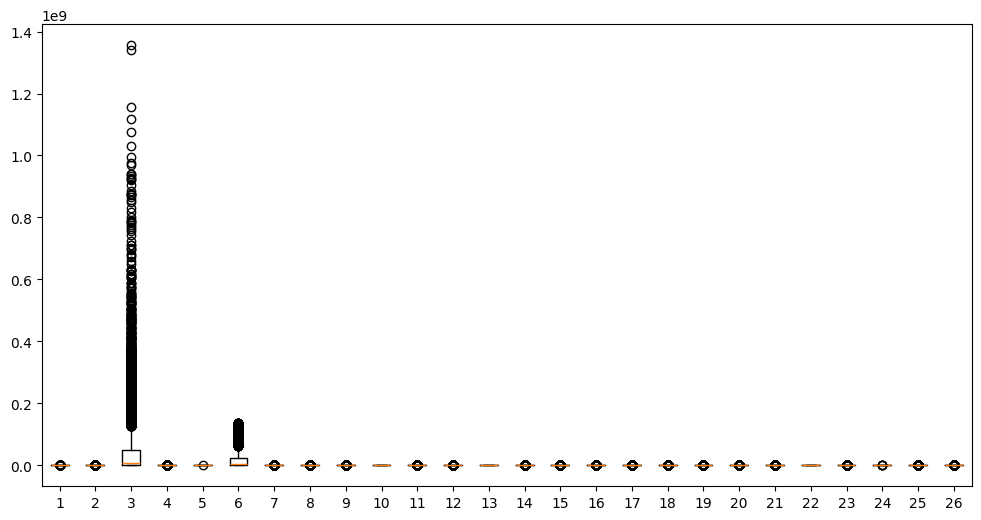

In [ ]:
from scipy.stats import zscore

def remove_outliers_zscore(df, column, threshold=3):
    # Calculate Z-scores for the specified column
    df["zscore"] = zscore(df[column])

    # Filter the DataFrame to exclude outliers
    filtered_df = df[abs(df["zscore"]) <= threshold].drop(columns="zscore")

    return filtered_df

# Remove outliers for both revenue
cleaned_df = remove_outliers_zscore(dataset_final, "revenue")
cleaned_df = remove_outliers_zscore(dataset_final, "budget")


plt.figure(figsize=(12, 6))  # Width=10, Height=6
plt.boxplot(cleaned_df)
plt.show()

In [ ]:
df = cleaned_df[(cleaned_df['budget'] >1000) & (cleaned_df['revenue'] > 1000)]
Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)

# Filter the values between Q1 and Q3 (excluding Q1 and Q3 themselves)
df = df[(df['revenue'] > Q1) & (df['revenue'] < Q3)]
df = df[(df['budget'] > Q1) & (df['budget'] < Q3)]


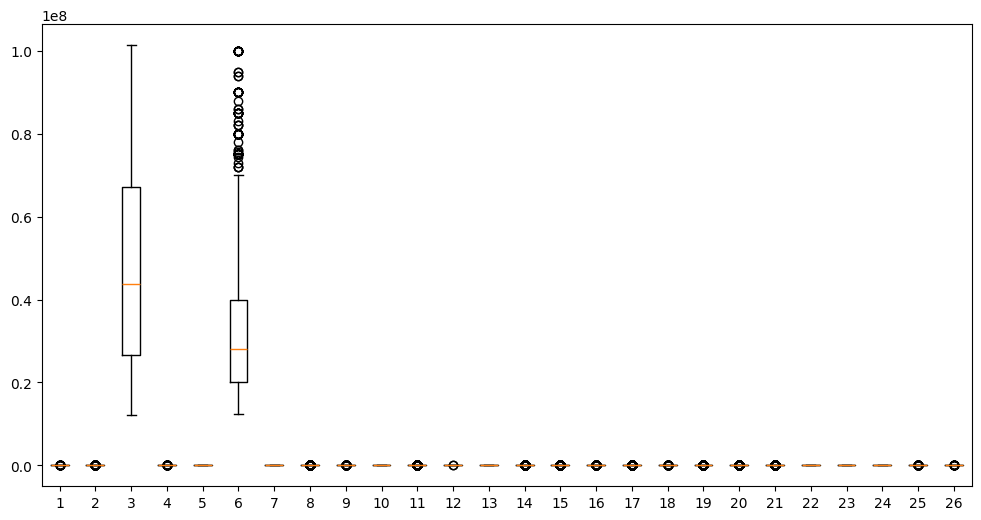

In [ ]:
plt.figure(figsize=(12, 6))  # Width=10, Height=6
plt.boxplot(df)
plt.show()

# Splitting the dataset into the Training set and Test set


In [ ]:
X = df['budget']
y = df['revenue']


Turningt the Dependent Variable (Y) into a 2D structure eg Dataframe

**WHY**:  *Some machine learning algorithms and functions expect the target variable (y) to be a 2D structure (e.g., shape = (n_samples, 1)) rather than a 1D Series.*

In [ ]:
if isinstance(y, pd.Series):
    y = y.to_frame()  # Convert Series to DataFrame
elif isinstance(y, np.ndarray) and y.ndim == 1:
    y = y.reshape(-1, 1)

In [ ]:
if isinstance(X, pd.Series):
    X = X.to_frame()  # Convert Series to DataFrame
elif isinstance(X, np.ndarray) and X.ndim == 1:
    X = X.reshape(-1, 1)

Splitting the dataset using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
print(X_train)

        budget
4498  60000000
3997  43000000
7819  17000000
1725  64000000
4506  28000000
...        ...
664   30000000
1961  43000000
893   42000000
3279  20000000
6961  25000000

[1449 rows x 1 columns]


S

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns_to_scale = ['budget','vote_count', 'runtime']
X_train[columns_to_scale] = sc.fit_transform(X_train[columns_to_scale])
print(X_train)

        budget
4498  60000000
3997  43000000
7819  17000000
1725  64000000
4506  28000000
...        ...
664   30000000
1961  43000000
893   42000000
3279  20000000
6961  25000000

[1449 rows x 1 columns]


In [ ]:
X_train.describe()

,budget
count,1.449000e+03
mean,3.315145e+07
std,1.821562e+07
min,1.230000e+07
25%,2.000000e+07
50%,2.800000e+07
75%,4.000000e+07
max,1.000000e+08


Feature Scaling On X_test

In [ ]:
sc_X_test = StandardScaler()
sc_Y_tset = StandardScaler()

columns_to_scale = ['budget','vote_count', 'runtime']
#X_test[columns_to_scale] = sc_X_test.fit_transform(X_test[columns_to_scale])
#y_test = sc_Y_tset.fit_transform(y_test.values.reshape(-1, 1))
print(X_test)

        budget
8539  37580800
5259  45000000
5986  58000000
473   30000000
2750  22000000
...        ...
5571  15000000
1942  40000000
6575  35000000
2339  82000000
2027  20000000

[363 rows x 1 columns]


In [ ]:
X_test.describe()

,budget
count,3.630000e+02
mean,3.249450e+07
std,1.857978e+07
min,1.300000e+07
25%,2.000000e+07
50%,2.700000e+07
75%,4.000000e+07
max,1.000000e+08


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(y_pred)

[44332088.19 44332122.58 44332152.15 44332048.42 44332019.02 44332074.51
 44332048.42 44332024.08 44332019.02 44332016.47 44332015.4  44332100.45
 44332017.97 44332015.85 44332048.42 44332085.15 44332014.79 44332019.02
 44332153.04 44332048.42 44332019.87 44332122.58 44332014.65 44332043.63
 44332120.04 44332151.8  44332074.51 44332074.51 44332048.42 44332017.97
 44332016.47 44332085.15 44332015.85 44332019.02 44332019.87 44332114.34
 44332138.99 44332074.51 44332100.45 44332149.08 44332019.02 44332058.57
 44332075.05 44332074.51 44332027.26 44332153.04 44332149.08 44332019.87
 44332053.42 44332048.42 44332014.65 44332016.47 44332053.42 44332146.86
 44332138.99 44332138.99 44332016.47 44332074.51 44332015.   44332146.86
 44332085.15 44332015.85 44332100.45 44332027.26 44332069.16 44332016.47
 44332021.32 44332017.19 44332048.42 44332018.87 44332019.02 44332015.4
 44332053.42 44332014.76 44332074.51 44332100.45 44332016.47 44332015.85
 44332014.65 44332036.89 44332015.85 44332014.79 443

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


-0.012496857152076712

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [ ]:
r2_score(y_test, y_pred)

0.04410799947170152